Columns: ['Player1_Strategy', 'Player2_Strategy', 'Player1_Score', 'Player2_Score', 'Winner', 'Moves', 'Time_Seconds']
  Player1_Strategy Player2_Strategy  Player1_Score  Player2_Score   Winner  \
0           Random           Random              8             12  Player2   
1           Random           Random             12             12     Draw   
2           Random           Random             25              9  Player1   
3           Random           Random              6             10  Player2   
4           Random           Random             12              7  Player1   

   Moves  Time_Seconds  
0     16           0.0  
1     18           0.0  
2     19           0.0  
3     14           0.0  
4     16           0.0  

Win Rates (%):
Winner
Draw        0.4
Player1     4.8
Player2    94.8
Name: count, dtype: float64


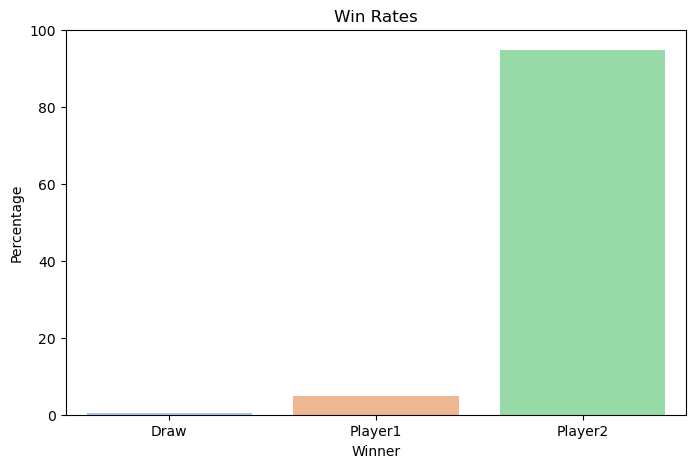


Time Analysis:
count    1000.000000
mean        0.282109
std         0.391736
min         0.000000
25%         0.105000
50%         0.209000
75%         0.324000
max         6.229000
Name: Time_Seconds, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


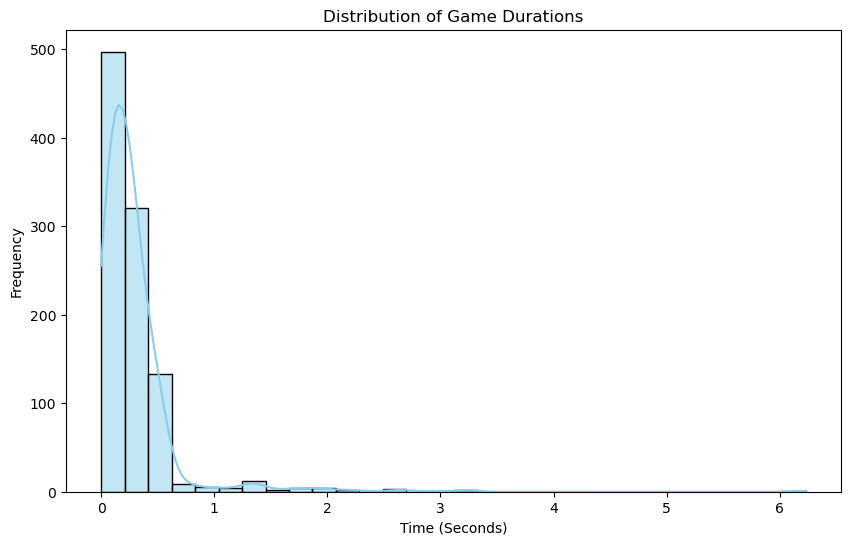

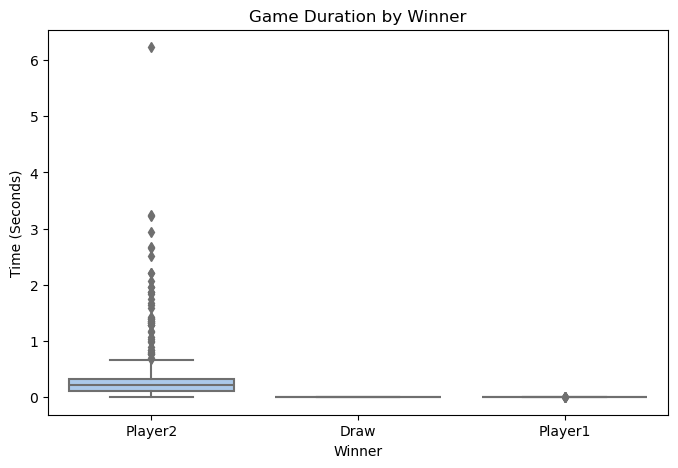

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'mancala_simulations.csv'  # Update if needed
df = pd.read_csv(file_path)

# Basic overview
print("Columns:", df.columns.tolist())
print(df.head())

# Win Rate Analysis
win_counts = df['Winner'].value_counts().sort_index()
total_games = len(df)

# Convert to percentages
win_rates = (win_counts / total_games) * 100

print("\nWin Rates (%):")
print(win_rates)

# Win Rate Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=win_rates.index, y=win_rates.values, palette="pastel")
plt.title('Win Rates')
plt.xlabel('Winner')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

# Time Analysis
time_stats = df['Time_Seconds'].describe()

print("\nTime Analysis:")
print(time_stats)

# Time Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Time_Seconds'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Game Durations')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')
plt.show()

# Time vs Winner Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Winner', y='Time_Seconds', data=df, palette='pastel')
plt.title('Game Duration by Winner')
plt.xlabel('Winner')
plt.ylabel('Time (Seconds)')
plt.show()




No 'First_Player' and 'Second_Player' columns found! Simulating a basic win matrix:

Win Rate Matrix (%):
Winner        Draw  Player1  Player2
First_Player                        
Player 1       0.2      5.2     94.6
Player 2       0.6      4.4     95.0


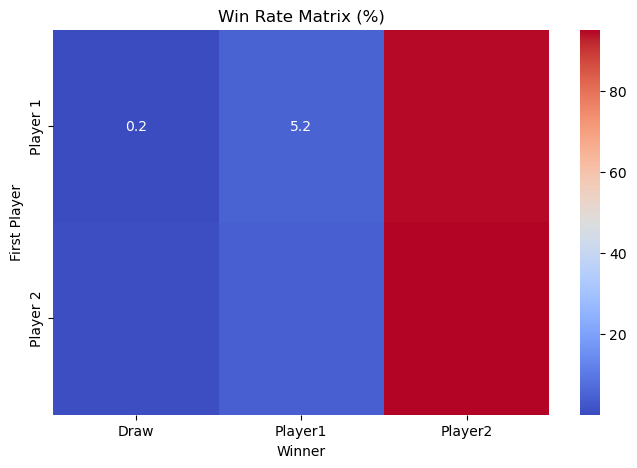

In [2]:

# ---- WIN RATE MATRIX ----
# Assuming there’s a 'First_Player' and 'Second_Player' column
# If not, we can simulate it
if 'First_Player' in df.columns and 'Second_Player' in df.columns:
    matrix_data = pd.crosstab(df['First_Player'], df['Winner'], normalize='index') * 100
else:
    print("\nNo 'First_Player' and 'Second_Player' columns found! Simulating a basic win matrix:")
    # Simulate dummy players for illustration (replace this if you have real player data)
    df['First_Player'] = ['Player 1' if i % 2 == 0 else 'Player 2' for i in range(len(df))]
    df['Second_Player'] = ['Player 2' if i % 2 == 0 else 'Player 1' for i in range(len(df))]
    matrix_data = pd.crosstab(df['First_Player'], df['Winner'], normalize='index') * 100

print("\nWin Rate Matrix (%):")
print(matrix_data)

# Heatmap of Win Rate Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(matrix_data, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Win Rate Matrix (%)')
plt.xlabel('Winner')
plt.ylabel('First Player')
plt.show()

In [7]:
import pandas as pd
import numpy as np

# Load the CSV file (adjust path as needed)
file_path = 'mancala_results.csv'
df = pd.read_csv(file_path)

# Calculate win counts and percentages
results = df.groupby(['Player1_Strategy', 'Player2_Strategy']).apply(
    lambda x: pd.Series({
        'Total Games': len(x),
        'Player1 Wins': (x['Winner'] == 'Player1').sum(),
        'Player2 Wins': (x['Winner'] == 'Player2').sum(),
        'Draws': (x['Winner'] == 'Draw').sum(),
        'Player1 Win %': (x['Winner'] == 'Player1').mean() * 100,
        'Player2 Win %': (x['Winner'] == 'Player2').mean() * 100,
        'Draw %': (x['Winner'] == 'Draw').mean() * 100
    })
).reset_index()

# Format percentages
percentage_cols = ['Player1 Win %', 'Player2 Win %', 'Draw %']
results[percentage_cols] = results[percentage_cols].round(2)

print(results[['Player1_Strategy', 'Player2_Strategy', 
              'Total Games', 'Player1 Win %', 'Player2 Win %', 'Draw %']])

# # Export to CSV if needed
# win_rate_table_display.to_csv('win_rate_table.csv')
# print("\nWin Rate Table exported to 'win_rate_table.csv'")

# Export matrices to CSV if needed
# win_rate_matrix.to_csv('win_rate_matrix.csv')
# time_matrix.to_csv('time_matrix.csv')
# print("\nMatrices exported to 'win_rate_matrix.csv' and 'time_matrix.csv'.")


      Player1_Strategy    Player2_Strategy  Total Games  Player1 Win %  \
0   Advanced Heuristic  Advanced Heuristic        100.0            0.0   
1   Advanced Heuristic  Minimax Alpha-Beta        100.0            0.0   
2   Advanced Heuristic              Random        100.0          100.0   
3   Advanced Heuristic      Simple Minimax        100.0            0.0   
4   Minimax Alpha-Beta  Advanced Heuristic        100.0            0.0   
5   Minimax Alpha-Beta  Minimax Alpha-Beta        100.0            0.0   
6   Minimax Alpha-Beta              Random        100.0           98.0   
7   Minimax Alpha-Beta      Simple Minimax        100.0            0.0   
8               Random  Advanced Heuristic        100.0            0.0   
9               Random  Minimax Alpha-Beta        100.0            0.0   
10              Random              Random        100.0           49.0   
11              Random      Simple Minimax        100.0            0.0   
12      Simple Minimax  Advanced Heuri

In [11]:
# Load the CSV file (adjust path as needed)
file_path = 'mancala_results.csv'
df = pd.read_csv(file_path)

# Sort strategy pairs to treat A vs B and B vs A as the same
df[['Strategy1', 'Strategy2']] = pd.DataFrame(
    np.sort(df[['Player1_Strategy', 'Player2_Strategy']], axis=1), 
    index=df.index
)

# Group by sorted pairs instead
results = df.groupby(['Strategy1', 'Strategy2']).apply(
    lambda x: pd.Series({
        'Total Games': len(x),
        'Player1 Wins': (x['Winner'] == 'Player1').sum(),
        'Player2 Wins': (x['Winner'] == 'Player2').sum(),
        'Draws': (x['Winner'] == 'Draw').sum(),
    })
).reset_index()

# Calculate percentages
results['Player1 Win %'] = (results['Player1 Wins'] / results['Total Games']) * 100
results['Player2 Win %'] = (results['Player2 Wins'] / results['Total Games']) * 100
results['Draw %'] = (results['Draws'] / results['Total Games']) * 100

# Format percentages
percentage_cols = ['Player1 Win %', 'Player2 Win %', 'Draw %']
results[percentage_cols] = results[percentage_cols].round(2)

print(results[['Strategy1', 'Strategy2', 
              'Total Games', 'Player1 Win %', 'Player2 Win %', 'Draw %']])

            Strategy1           Strategy2  Total Games  Player1 Win %  \
0  Advanced Heuristic  Advanced Heuristic          100            0.0   
1  Advanced Heuristic  Minimax Alpha-Beta          200            0.0   
2  Advanced Heuristic              Random          200           50.0   
3  Advanced Heuristic      Simple Minimax          200            0.0   
4  Minimax Alpha-Beta  Minimax Alpha-Beta          100            0.0   
5  Minimax Alpha-Beta              Random          200           49.0   
6  Minimax Alpha-Beta      Simple Minimax          200            0.0   
7              Random              Random          100           49.0   
8              Random      Simple Minimax          200           50.0   
9      Simple Minimax      Simple Minimax          100            0.0   

   Player2 Win %  Draw %  
0          100.0     0.0  
1          100.0     0.0  
2           50.0     0.0  
3          100.0     0.0  
4          100.0     0.0  
5           51.0     0.0  
6      